In [2]:
#Tutorial: https://medium.com/@kerry.halupka/getting-started-with-openais-clip-a3b8f5277867

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/n/fs/visualai-scr/temp_LLP/ellie/miniconda3/envs/ellie_env2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [24]:
import PIL.Image as Image
import requests
import torch

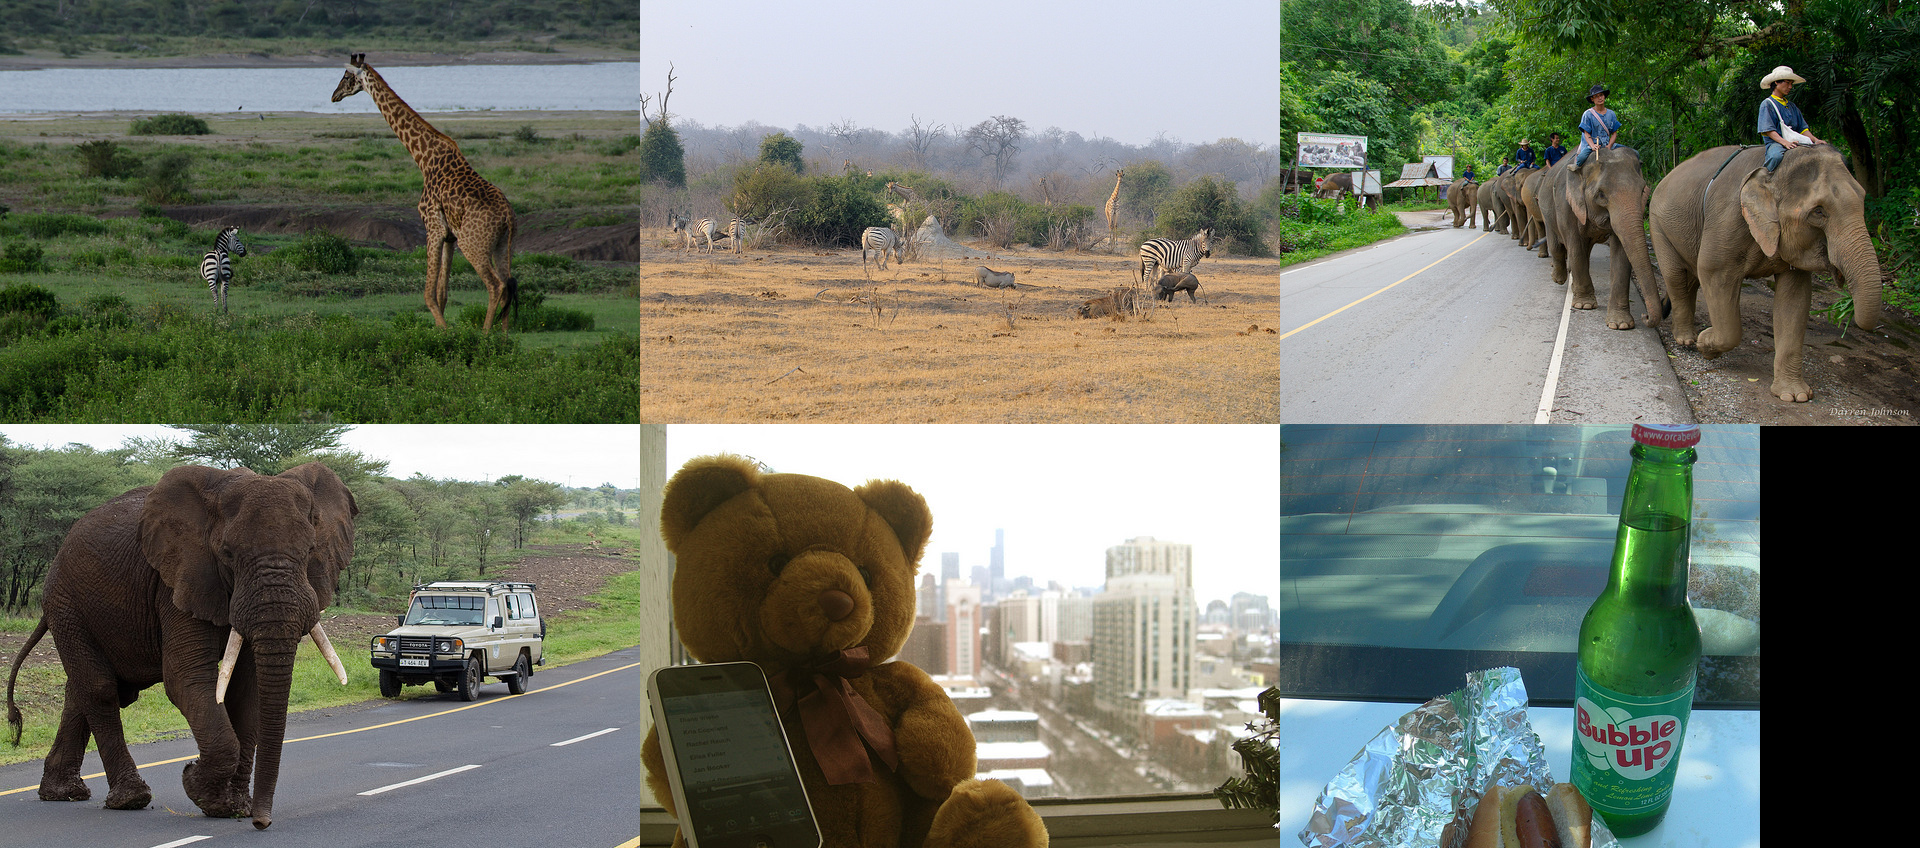

In [ ]:
def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

image_urls = [
    'http://images.cocodataset.org/val2014/COCO_val2014_000000159977.jpg', 
    'http://images.cocodataset.org/val2014/COCO_val2014_000000311295.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000457834.jpg', 
    'http://images.cocodataset.org/val2014/COCO_val2014_000000555472.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000174070.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000460929.jpg'
    ]
images = []
for url in image_urls:
    images.append(Image.open(requests.get(url, stream=True).raw))

grid = image_grid(images, cols=3)
display(grid)

In [10]:
print(type(images[0]))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [42]:
classes = ['giraffe', 'zebra', 'elephant', 'teddy bear', 'teddy bear holding a phone', 'dog', 'hot dog', 'hot dog with soda']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True, do_convert_rgb=False)
# print("inputs", inputs.keys())
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities over the different text classes

In [36]:
print(outputs.keys())

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])


In [44]:
print("logits per images", logits_per_image)

logits per images tensor([[26.2836, 24.4544, 19.6819, 14.3011, 12.0909, 17.2828, 14.7315, 12.3893],
        [24.2384, 23.8031, 24.5945, 15.8700, 12.6918, 16.7712, 15.1426, 13.2831],
        [16.9787, 16.9936, 24.7597, 16.2104, 10.3563, 14.3935, 13.6221, 11.0887],
        [23.0606, 19.8492, 27.2278, 18.6168, 15.3155, 17.8531, 15.9231, 13.8264],
        [19.6150, 15.1748, 20.0311, 26.9631, 31.6954, 16.7843, 16.4626, 15.6054],
        [15.0464, 15.2344, 16.5656, 17.8621, 14.9828, 21.0362, 26.6557, 31.0070]],
       grad_fn=<TBackward0>)


In [40]:
print("probs", probs[0].sum())

probs tensor(1., grad_fn=<SumBackward0>)


In [43]:
predicted = torch.argmax(logits_per_image, dim=1) #Gets the class w/ highest probability for each images
print("Predicted", predicted)
predicted_classes = [classes[class_num] for class_num in predicted]
print("Predicted classes:", predicted_classes)

Predicted tensor([0, 2, 2, 2, 4, 7])
Predicted classes: ['giraffe', 'elephant', 'elephant', 'elephant', 'teddy bear holding a phone', 'hot dog with soda']
